In [196]:
# importing numpy pandas mathplot , seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,LabelEncoder,OneHotEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest ,f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [197]:
#loading the data set
data =pd.read_csv('london_weather_data_1979_to_2023.csv')

In [198]:
data

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,0,55.0,0,89.0,0,0.0,0,0.0,...,46.0,0,12.0,0,10067.0,0,89.0,0,8.0,0
16432,20231228,119.0,0,97.0,0,112.0,0,2.0,0,0.0,...,48.0,0,15.0,0,10051.0,0,81.0,0,7.0,0
16433,20231229,122.0,0,92.0,0,106.0,0,7.0,0,0.0,...,0.0,0,20.0,0,10071.0,0,78.0,0,6.0,0
16434,20231230,107.0,0,56.0,0,89.0,0,0.0,0,0.0,...,56.0,0,12.0,0,10046.0,0,87.0,0,7.0,0


In [199]:
#converting data into dataframe
df=pd.DataFrame(data)

In [200]:
df

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,0,55.0,0,89.0,0,0.0,0,0.0,...,46.0,0,12.0,0,10067.0,0,89.0,0,8.0,0
16432,20231228,119.0,0,97.0,0,112.0,0,2.0,0,0.0,...,48.0,0,15.0,0,10051.0,0,81.0,0,7.0,0
16433,20231229,122.0,0,92.0,0,106.0,0,7.0,0,0.0,...,0.0,0,20.0,0,10071.0,0,78.0,0,6.0,0
16434,20231230,107.0,0,56.0,0,89.0,0,0.0,0,0.0,...,56.0,0,12.0,0,10046.0,0,87.0,0,7.0,0


In [201]:
# passing first five values
df.head()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0


In [202]:
#passing last five values
df.tail()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
16431,20231227,126.0,0,55.0,0,89.0,0,0.0,0,0.0,...,46.0,0,12.0,0,10067.0,0,89.0,0,8.0,0
16432,20231228,119.0,0,97.0,0,112.0,0,2.0,0,0.0,...,48.0,0,15.0,0,10051.0,0,81.0,0,7.0,0
16433,20231229,122.0,0,92.0,0,106.0,0,7.0,0,0.0,...,0.0,0,20.0,0,10071.0,0,78.0,0,6.0,0
16434,20231230,107.0,0,56.0,0,89.0,0,0.0,0,0.0,...,56.0,0,12.0,0,10046.0,0,87.0,0,7.0,0
16435,20231231,124.0,0,57.0,0,82.0,0,5.0,0,0.0,...,16.0,0,18.0,0,9891.0,0,85.0,0,7.0,0


In [203]:
#count of number of rows and coloumns
df.shape

(16436, 21)

In [204]:
#generating all the column names
df.columns

Index(['DATE', 'TX', 'Q_TX', 'TN', 'Q_TN', 'TG', 'Q_TG', 'SS', 'Q_SS', 'SD',
       'Q_SD', 'RR', 'Q_RR', 'QQ', 'Q_QQ', 'PP', 'Q_PP', 'HU', 'Q_HU', 'CC',
       'Q_CC'],
      dtype='object')

In [205]:
#describes the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16436 non-null  int64  
 1   TX      16436 non-null  float64
 2   Q_TX    16436 non-null  int64  
 3   TN      16436 non-null  float64
 4   Q_TN    16436 non-null  int64  
 5   TG      16407 non-null  float64
 6   Q_TG    16436 non-null  int64  
 7   SS      16436 non-null  float64
 8   Q_SS    16436 non-null  int64  
 9   SD      15361 non-null  float64
 10  Q_SD    16436 non-null  int64  
 11  RR      16436 non-null  float64
 12  Q_RR    16436 non-null  int64  
 13  QQ      16411 non-null  float64
 14  Q_QQ    16436 non-null  int64  
 15  PP      16432 non-null  float64
 16  Q_PP    16436 non-null  int64  
 17  HU      16379 non-null  float64
 18  Q_HU    16436 non-null  int64  
 19  CC      16418 non-null  float64
 20  Q_CC    16436 non-null  int64  
dtypes: float64(10), int64(11)
memory us

In [206]:
df.describe() #descriptive startegy

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
count,1.643600e+04,16436.000000,16436.000000,16436.000000,16436.000000,16407.000000,16436.000000,16436.000000,16436.0,15361.000000,...,16436.000000,16436.0,16411.00000,16436.000000,16432.000000,16436.00000,16379.000000,16436.000000,16418.000000,16436.000000
mean,2.001066e+07,154.686846,0.068082,76.016427,0.015454,115.373316,0.083962,43.153626,0.0,0.034633,...,16.791738,0.0,119.52020,0.017036,10153.889423,0.00219,76.283717,0.031212,5.256426,0.009978
std,1.298742e+05,65.741246,0.251895,53.392049,0.123353,57.457444,0.451623,39.992648,0.0,0.519639,...,37.614507,0.0,89.26958,0.355343,105.196268,0.14039,10.520699,0.529104,2.091593,0.297885
min,1.979010e+07,-62.000000,0.000000,-118.000000,0.000000,-76.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,9596.000000,0.00000,33.000000,0.000000,0.000000,0.000000
25%,1.990040e+07,106.000000,0.000000,36.000000,0.000000,72.000000,0.000000,4.000000,0.0,0.000000,...,0.000000,0.0,42.00000,0.000000,10091.000000,0.00000,69.000000,0.000000,4.000000,0.000000
50%,2.001070e+07,151.000000,0.000000,78.000000,0.000000,114.000000,0.000000,35.000000,0.0,0.000000,...,0.000000,0.0,96.00000,0.000000,10162.000000,0.00000,77.000000,0.000000,6.000000,0.000000
75%,2.012095e+07,204.000000,0.000000,118.000000,0.000000,161.000000,0.000000,71.000000,0.0,0.000000,...,16.000000,0.0,187.00000,0.000000,10225.000000,0.00000,84.000000,0.000000,7.000000,0.000000
max,2.023123e+07,402.000000,1.000000,223.000000,1.000000,309.000000,9.000000,157.000000,0.0,22.000000,...,618.000000,0.0,402.00000,9.000000,10477.000000,9.00000,100.000000,9.000000,9.000000,9.000000


In [207]:
#shows the data types of all the columns
df.dtypes

DATE      int64
TX      float64
Q_TX      int64
TN      float64
Q_TN      int64
TG      float64
Q_TG      int64
SS      float64
Q_SS      int64
SD      float64
Q_SD      int64
RR      float64
Q_RR      int64
QQ      float64
Q_QQ      int64
PP      float64
Q_PP      int64
HU      float64
Q_HU      int64
CC      float64
Q_CC      int64
dtype: object

In [208]:
#handling missing values

In [209]:
#finding whether there is any null values
df.isnull()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16433,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [210]:
#finding the na or none values
df.isna()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16433,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [211]:
#describes the sum of all na or none values in each column (count)
df.isna().sum()

DATE       0
TX         0
Q_TX       0
TN         0
Q_TN       0
TG        29
Q_TG       0
SS         0
Q_SS       0
SD      1075
Q_SD       0
RR         0
Q_RR       0
QQ        25
Q_QQ       0
PP         4
Q_PP       0
HU        57
Q_HU       0
CC        18
Q_CC       0
dtype: int64

In [212]:
#if any na values exist then it is dropped or removed 
df.dropna()


,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,0,55.0,0,89.0,0,0.0,0,0.0,...,46.0,0,12.0,0,10067.0,0,89.0,0,8.0,0
16432,20231228,119.0,0,97.0,0,112.0,0,2.0,0,0.0,...,48.0,0,15.0,0,10051.0,0,81.0,0,7.0,0
16433,20231229,122.0,0,92.0,0,106.0,0,7.0,0,0.0,...,0.0,0,20.0,0,10071.0,0,78.0,0,6.0,0
16434,20231230,107.0,0,56.0,0,89.0,0,0.0,0,0.0,...,56.0,0,12.0,0,10046.0,0,87.0,0,7.0,0


In [213]:
df.isna().sum()

DATE       0
TX         0
Q_TX       0
TN         0
Q_TN       0
TG        29
Q_TG       0
SS         0
Q_SS       0
SD      1075
Q_SD       0
RR         0
Q_RR       0
QQ        25
Q_QQ       0
PP         4
Q_PP       0
HU        57
Q_HU       0
CC        18
Q_CC       0
dtype: int64

In [214]:
df = df.fillna(df.mode().iloc[0])

In [215]:
df.isna().sum()

DATE    0
TX      0
Q_TX    0
TN      0
Q_TN    0
TG      0
Q_TG    0
SS      0
Q_SS    0
SD      0
Q_SD    0
RR      0
Q_RR    0
QQ      0
Q_QQ    0
PP      0
Q_PP    0
HU      0
Q_HU    0
CC      0
Q_CC    0
dtype: int64

In [216]:
#duplicate values are identified here 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16431    False
16432    False
16433    False
16434    False
16435    False
Length: 16436, dtype: bool

In [217]:
df.duplicated().sum()

np.int64(0)

In [218]:
df.dtypes # finding datatype

DATE      int64
TX      float64
Q_TX      int64
TN      float64
Q_TN      int64
TG      float64
Q_TG      int64
SS      float64
Q_SS      int64
SD      float64
Q_SD      int64
RR      float64
Q_RR      int64
QQ      float64
Q_QQ      int64
PP      float64
Q_PP      int64
HU      float64
Q_HU      int64
CC      float64
Q_CC      int64
dtype: object

In [219]:
df

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,0,55.0,0,89.0,0,0.0,0,0.0,...,46.0,0,12.0,0,10067.0,0,89.0,0,8.0,0
16432,20231228,119.0,0,97.0,0,112.0,0,2.0,0,0.0,...,48.0,0,15.0,0,10051.0,0,81.0,0,7.0,0
16433,20231229,122.0,0,92.0,0,106.0,0,7.0,0,0.0,...,0.0,0,20.0,0,10071.0,0,78.0,0,6.0,0
16434,20231230,107.0,0,56.0,0,89.0,0,0.0,0,0.0,...,56.0,0,12.0,0,10046.0,0,87.0,0,7.0,0


In [220]:
#count of a particular column is generated
a=df['Q_TX'].value_counts()

In [221]:
a

Q_TX
0    15317
1     1119
Name: count, dtype: int64

In [222]:
#gets the unique values from the specific column
df['DATE'].unique() 

array([19790101, 19790102, 19790103, ..., 20231229, 20231230, 20231231],
      shape=(16436,))

In [223]:
#renaming the column names if required

In [224]:
df=df.rename(columns={'TX': 'Daily Max Temp'})

In [225]:
df=df.rename(columns={'TN': 'Daily Min Temp'})

In [226]:
df=df.rename(columns={'TG': 'Daily Mean Temp'})

In [227]:
df=df.rename(columns={'SS': 'Sunshine Duration'})

In [228]:
df=df.rename(columns={'SD': 'Snow Depth'})

In [229]:
df=df.rename(columns={'RR': 'Precipitation Amt'})

In [230]:
df=df.rename(columns={'QQ': 'Global Radiation'})

In [231]:
df=df.rename(columns={'PP': 'Sealevel Pressure'})

In [232]:
df=df.rename(columns={'HU': 'Relative Humidity'})

In [233]:
df=df.rename(columns={'CC': 'Cloud Cover'})

In [234]:
#values inside the column is replaced if required
df.replace({'Q_TX':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [235]:
df.replace({'Q_TN':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [236]:
df.replace({'Q_SS':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [237]:
df.replace({'Q_RR':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [238]:
df.replace({'Q_QQ':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [239]:
df.replace({'Q_PP':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [240]:
df.replace({'Q_HU':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [241]:
df.replace({'Q_CC':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [242]:
df

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
0,19790101,23.0,Valid,-75.0,Valid,-41.0,0,70.0,Valid,9.0,...,4.0,Valid,52.0,Valid,10190.0,Valid,83.0,Valid,2.0,Valid
1,19790102,16.0,Valid,-75.0,Valid,-26.0,0,17.0,Valid,8.0,...,0.0,Valid,27.0,Valid,10253.0,Valid,76.0,Valid,6.0,Valid
2,19790103,13.0,Valid,-72.0,Valid,-28.0,0,0.0,Valid,4.0,...,0.0,Valid,13.0,Valid,10205.0,Valid,86.0,Valid,5.0,Valid
3,19790104,-3.0,Valid,-65.0,Valid,-26.0,0,0.0,Valid,2.0,...,0.0,Valid,13.0,Valid,10084.0,Valid,68.0,Valid,8.0,Valid
4,19790105,56.0,Valid,-14.0,Valid,-8.0,0,20.0,Valid,1.0,...,0.0,Valid,29.0,Valid,10225.0,Valid,73.0,Valid,6.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,Valid,55.0,Valid,89.0,0,0.0,Valid,0.0,...,46.0,Valid,12.0,Valid,10067.0,Valid,89.0,Valid,8.0,Valid
16432,20231228,119.0,Valid,97.0,Valid,112.0,0,2.0,Valid,0.0,...,48.0,Valid,15.0,Valid,10051.0,Valid,81.0,Valid,7.0,Valid
16433,20231229,122.0,Valid,92.0,Valid,106.0,0,7.0,Valid,0.0,...,0.0,Valid,20.0,Valid,10071.0,Valid,78.0,Valid,6.0,Valid
16434,20231230,107.0,Valid,56.0,Valid,89.0,0,0.0,Valid,0.0,...,56.0,Valid,12.0,Valid,10046.0,Valid,87.0,Valid,7.0,Valid


In [243]:
#flitering
filtered_df=df[df['Snow Depth']==0.0]

In [244]:
filtered_df

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
6,19790107,85.0,Valid,-53.0,Valid,15.0,0,0.0,Valid,0.0,...,52.0,Valid,13.0,Valid,10252.0,Valid,93.0,Valid,8.0,Valid
7,19790108,58.0,Suspect,53.0,Valid,69.0,1,1.0,Valid,0.0,...,8.0,Valid,15.0,Valid,10187.0,Valid,95.0,Valid,8.0,Valid
8,19790109,52.0,Valid,16.0,Valid,37.0,0,58.0,Valid,0.0,...,72.0,Valid,50.0,Valid,10117.0,Valid,86.0,Valid,4.0,Valid
9,19790110,49.0,Valid,14.0,Valid,33.0,0,19.0,Valid,0.0,...,21.0,Valid,30.0,Valid,9870.0,Valid,87.0,Valid,7.0,Valid
10,19790111,29.0,Valid,3.0,Valid,26.0,0,68.0,Valid,0.0,...,23.0,Valid,55.0,Valid,9896.0,Valid,78.0,Valid,1.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,Valid,55.0,Valid,89.0,0,0.0,Valid,0.0,...,46.0,Valid,12.0,Valid,10067.0,Valid,89.0,Valid,8.0,Valid
16432,20231228,119.0,Valid,97.0,Valid,112.0,0,2.0,Valid,0.0,...,48.0,Valid,15.0,Valid,10051.0,Valid,81.0,Valid,7.0,Valid
16433,20231229,122.0,Valid,92.0,Valid,106.0,0,7.0,Valid,0.0,...,0.0,Valid,20.0,Valid,10071.0,Valid,78.0,Valid,6.0,Valid
16434,20231230,107.0,Valid,56.0,Valid,89.0,0,0.0,Valid,0.0,...,56.0,Valid,12.0,Valid,10046.0,Valid,87.0,Valid,7.0,Valid


In [245]:
#filter using and operator with two Columns
f1 = df[(df['Snow Depth'] == 0.0) & (df['Precipitation Amt'] == 0.0)]

In [246]:
f1

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
19,19790120,35.0,Valid,-10.0,Valid,31.0,0,0.0,Valid,0.0,...,0.0,Valid,16.0,Valid,10092.0,Valid,93.0,Valid,7.0,Valid
26,19790127,45.0,Valid,-52.0,Valid,-18.0,0,21.0,Valid,0.0,...,0.0,Valid,39.0,Valid,9977.0,Valid,90.0,Valid,4.0,Valid
32,19790202,59.0,Valid,15.0,Valid,28.0,0,14.0,Valid,0.0,...,0.0,Valid,37.0,Valid,9989.0,Valid,82.0,Valid,5.0,Valid
33,19790203,45.0,Valid,-41.0,Valid,9.0,0,87.0,Valid,0.0,...,0.0,Valid,85.0,Valid,10077.0,Valid,82.0,Valid,1.0,Valid
34,19790204,60.0,Valid,-12.0,Valid,16.0,0,1.0,Valid,0.0,...,0.0,Valid,23.0,Valid,10006.0,Valid,89.0,Valid,8.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16420,20231216,121.0,Valid,55.0,Valid,85.0,0,0.0,Valid,0.0,...,0.0,Valid,12.0,Valid,10388.0,Valid,90.0,Valid,8.0,Valid
16421,20231217,128.0,Valid,93.0,Valid,107.0,0,16.0,Valid,0.0,...,0.0,Valid,25.0,Valid,10343.0,Valid,80.0,Valid,8.0,Valid
16424,20231220,144.0,Valid,39.0,Valid,82.0,0,10.0,Valid,0.0,...,0.0,Valid,22.0,Valid,10185.0,Valid,85.0,Valid,5.0,Valid
16426,20231222,136.0,Valid,88.0,Valid,107.0,0,0.0,Valid,0.0,...,0.0,Valid,12.0,Valid,10131.0,Valid,74.0,Valid,7.0,Valid


In [247]:
#sorting
sort_s=df.sort_values(by='Snow Depth')

In [248]:
sort_s

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
16434,20231230,107.0,Valid,56.0,Valid,89.0,0,0.0,Valid,0.0,...,56.0,Valid,12.0,Valid,10046.0,Valid,87.0,Valid,7.0,Valid
16417,20231213,85.0,Valid,76.0,Valid,79.0,0,0.0,Valid,0.0,...,6.0,Valid,12.0,Valid,10032.0,Valid,89.0,Valid,8.0,Valid
16418,20231214,105.0,Valid,25.0,Valid,55.0,0,0.0,Valid,0.0,...,6.0,Valid,12.0,Valid,10219.0,Valid,91.0,Valid,7.0,Valid
16419,20231215,115.0,Valid,40.0,Valid,72.0,0,0.0,Valid,0.0,...,0.0,Valid,12.0,Valid,10358.0,Valid,82.0,Valid,6.0,Valid
16420,20231216,121.0,Valid,55.0,Valid,85.0,0,0.0,Valid,0.0,...,0.0,Valid,12.0,Valid,10388.0,Valid,90.0,Valid,8.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,19820111,24.0,Valid,-53.0,Valid,-18.0,0,70.0,Valid,15.0,...,0.0,Valid,56.0,Valid,10075.0,Valid,80.0,Valid,4.0,Valid
1104,19820109,-8.0,Valid,-36.0,Valid,-26.0,0,0.0,Valid,16.0,...,19.0,Valid,14.0,Valid,10145.0,Valid,88.0,Valid,8.0,Valid
1105,19820110,17.0,Valid,-63.0,Valid,-36.0,0,28.0,Valid,18.0,...,0.0,Valid,35.0,Valid,10111.0,Valid,77.0,Valid,5.0,Valid
1077,19811213,66.0,Valid,-118.0,Valid,-36.0,0,0.0,Valid,20.0,...,157.0,Valid,12.0,Valid,9961.0,Valid,90.0,Valid,7.0,Valid


In [249]:
grouped_df=df.groupby('Snow Depth')['Daily Max Temp'].mean()

In [250]:
grouped_df

Snow Depth
0.0     155.766540
1.0      31.510204
2.0      44.807692
3.0      31.812500
4.0      19.294118
5.0      20.000000
6.0      36.600000
7.0      18.750000
8.0       3.000000
9.0      23.000000
10.0     84.500000
11.0     29.666667
12.0     -9.000000
13.0     10.000000
15.0     24.000000
16.0     -8.000000
18.0     17.000000
20.0     66.000000
22.0     45.000000
Name: Daily Max Temp, dtype: float64

In [251]:
c=df['Daily Max Temp']
d=df['Cloud Cover']

([<matplotlib.axis.XTick at 0x1f87fa58910>,
 [Text(0, 0, '0'),
  Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(300, 0, '300'),
  Text(400, 0, '400')])

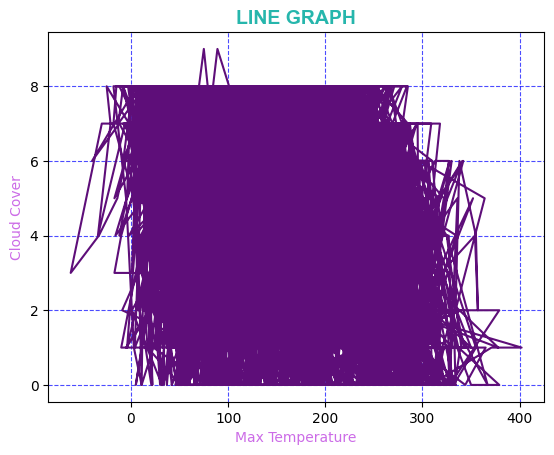

In [252]:
#Line Plot
plt.plot(c,d,color='#5E0E79' ) #ploting and giving color to the line
plt.title("LINE GRAPH",fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#26B6AC'}) #describes the title and font family 
plt.grid(True,linestyle='--',linewidth=.8,alpha=.7,color='blue') #adding grid lines and style ,width of it
plt.xlabel('Max Temperature',color='#CC6CE7') #giving label for X axis and color of the label
plt.ylabel('Cloud Cover',color='#CC6CE7') #giving label for Y axis and color of the label
plt.xticks([2,4,6,8])  #Points displayed on x axis 
plt.xticks([0,100,200,300,400]) #points displayed on Y axis

In [253]:
categories=df['Daily Max Temp']
values=df['Cloud Cover']

([<matplotlib.axis.XTick at 0x1f87faac910>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8')])

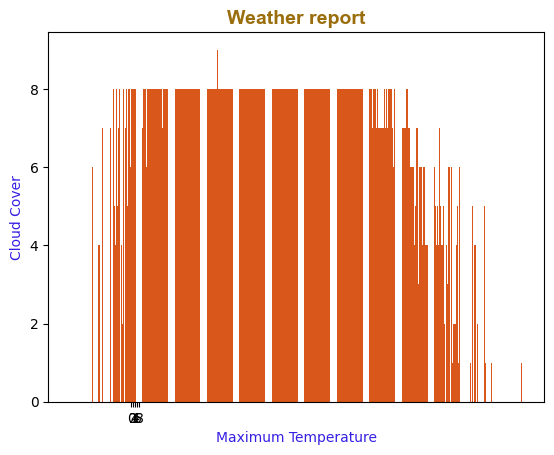

In [254]:
#Bar Plot
plt.bar(categories,values,color='#D9571B')#ploting and giving color to the line
plt.title('Weather report',fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#9A6E0D'}) #describes the title and font family 
plt.xlabel('Maximum Temperature',color='#351fe3') #giving label for X axis
plt.ylabel('Cloud Cover',color='#351fe3') #giving label for Y axis
plt.xticks([0.2,0.4,0.5,0.8])  #Points displayed on x axis 
plt.xticks([0,2,4,6,8]) #points displayed on Y axis

In [255]:
r=df['Sunshine Duration']

Text(0.5, 1.0, 'HISTOGRAM')

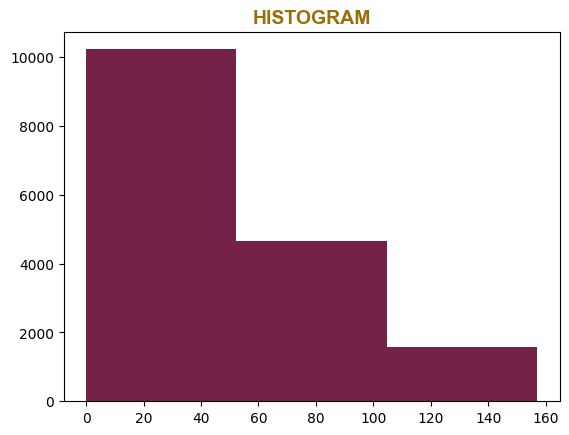

In [256]:
#plotting for Histogram
plt.hist(r,bins=3,color='#752249')#ploting and giving color 
plt.title("HISTOGRAM",fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#9A6E0D'}) #describes the title and font family 


In [257]:
e=df['Daily Mean Temp']
f=df['Global Radiation']

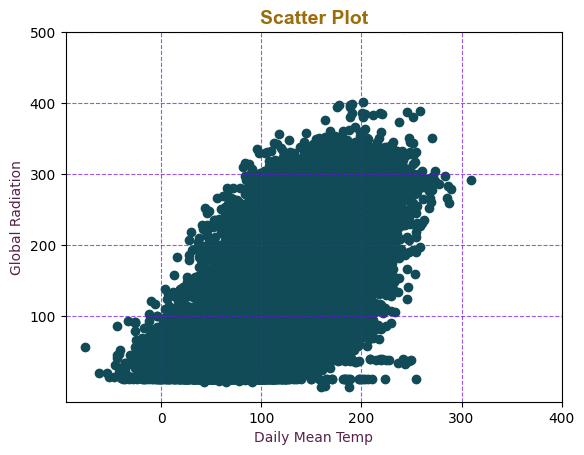

In [258]:
#scatter Plotting
plt.scatter(e,f,color='#104B57') #ploting and giving color
plt.title("Scatter Plot",fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#9A6E0D'}) #describes the title and font family 
plt.xlabel("Daily Mean Temp",color='#572348')#label for X axis and color
plt.ylabel("Global Radiation",color='#572348')#Label for Y axis and color
plt.xticks([0,100,200,300,400]) #values that are displayed on x axis 
plt.yticks([100,200,300,400,500]) #values that are displayed on Y axis
plt.grid(True,linestyle='--',linewidth=.8,alpha=.7,color='#6C11E4') #displaying the grid lines with style width and color

In [259]:
values=df['Sunshine Duration']
categories=df['Snow Depth']

Text(0.5, 1.0, 'PIE CHART')

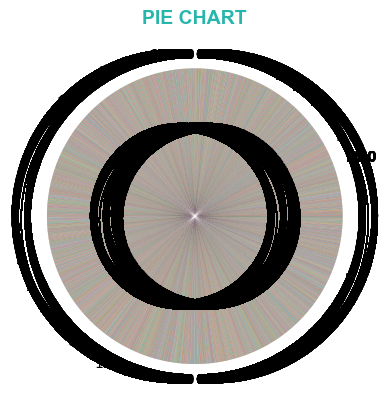

In [260]:
#pie chart 
plt.pie(values,labels=categories,autopct='%1.1f%%') # ploting 
plt.title("PIE CHART",fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#26B6AC'}) #describes the title and font family

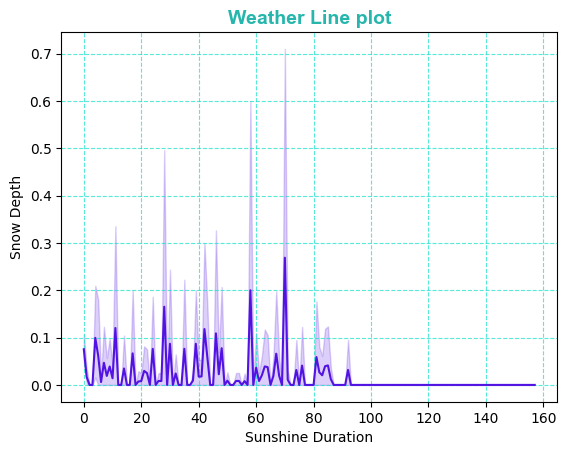

In [261]:
#Line Plot in seaborn
sns.lineplot(x='Sunshine Duration',y='Snow Depth',data=df,color='#5213E2') 
plt.title("Weather Line plot",fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#26B6AC'}) #describes the title and font family
plt.grid(True,linestyle='--',linewidth=.8,alpha=.7,color='#13E2C6') #displaying the grid lines with style width and color

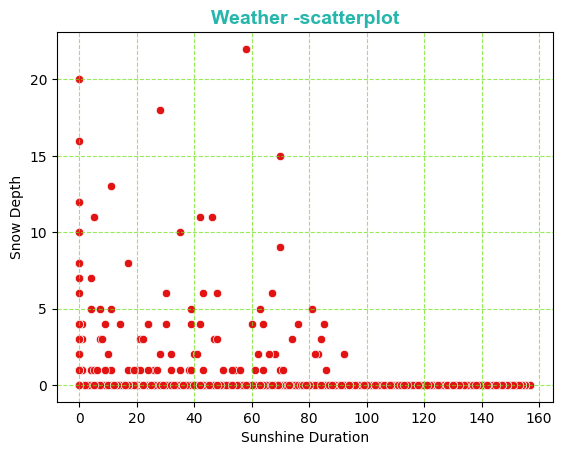

In [262]:
#Scatter plot in seaborn
sns.scatterplot(x='Sunshine Duration',y='Snow Depth',data=df,color='#E21313') # Plotting and color of the plot
plt.title("Weather -scatterplot",fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#26B6AC'}) #describes the title and font family
plt.grid(True,linestyle='--',linewidth=.8,alpha=.7,color='#6DE213') #displaying the grid lines with style width and color

Text(0.5, 1.0, 'Weather -Bar diagram')

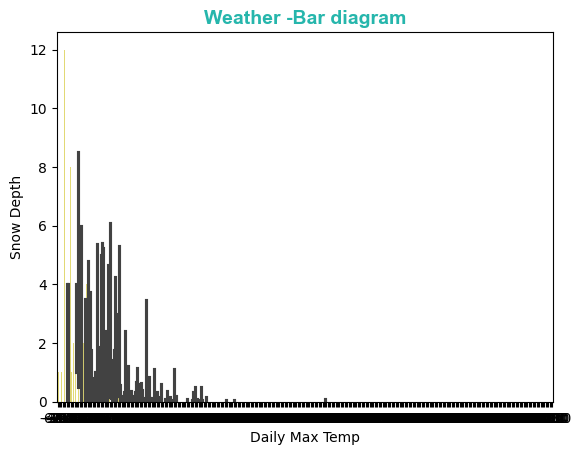

In [263]:
#bar Plot in sea born
sns.barplot(x='Daily Max Temp',y='Snow Depth',data=df,color='#F4E863') # Plotting and color of the plot
plt.title("Weather -Bar diagram",fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#26B6AC'}) #describes the title and font family)

Text(0.5, 1.0, 'Weather')

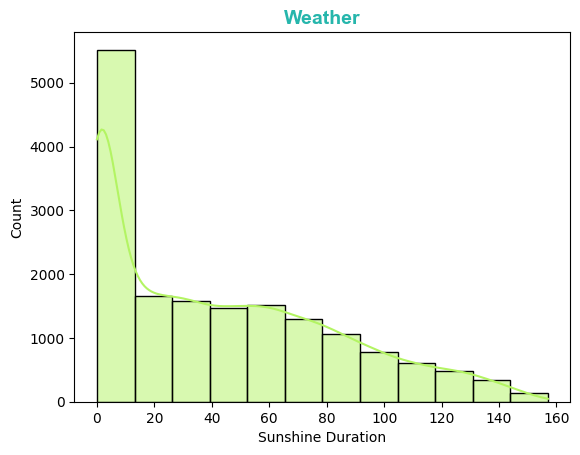

In [264]:
#Histogram in seaborn
sns.histplot(data=df,x='Sunshine Duration',bins=12,kde=True,color='#B3F463')
plt.title("Weather",fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#26B6AC'}) #describes the title and font family

<Axes: >

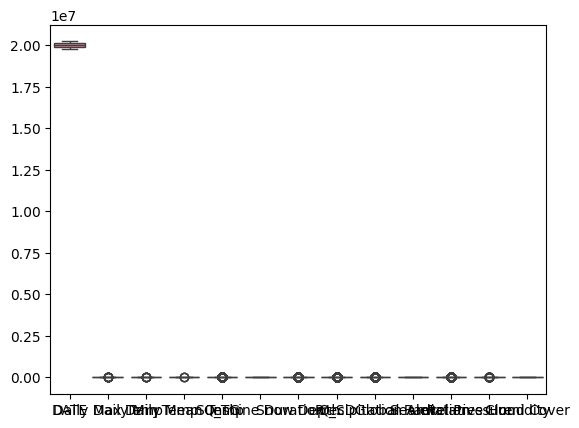

In [265]:
#box plot to find the outliers
sns.boxplot(data=df)

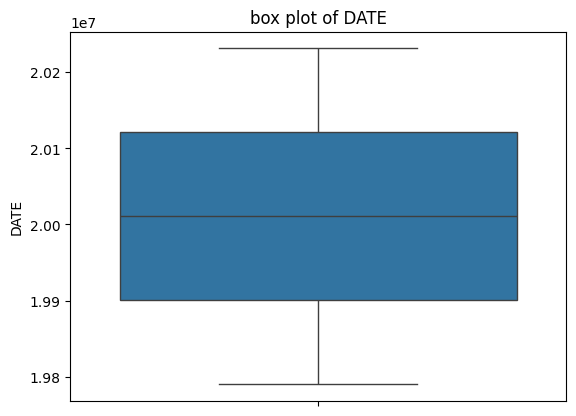

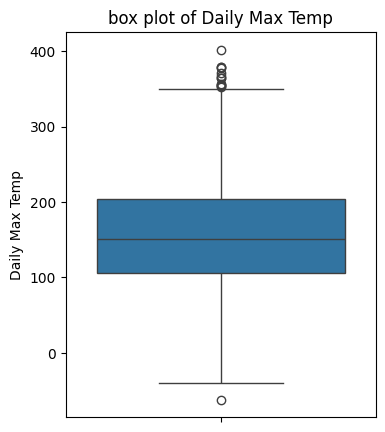

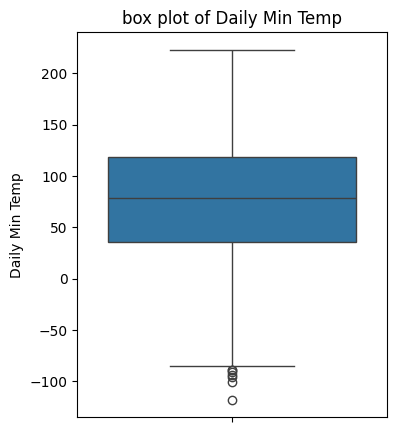

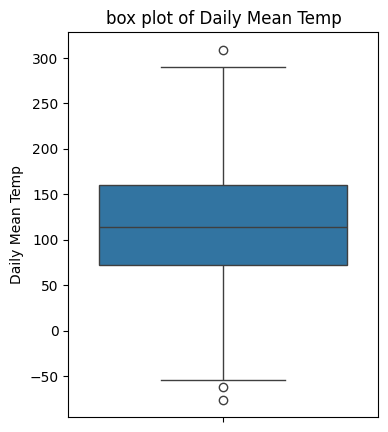

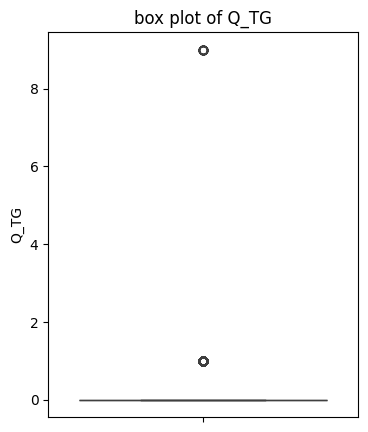

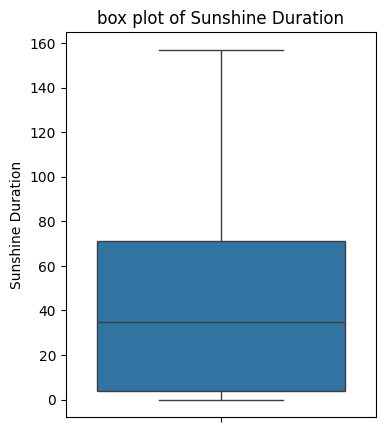

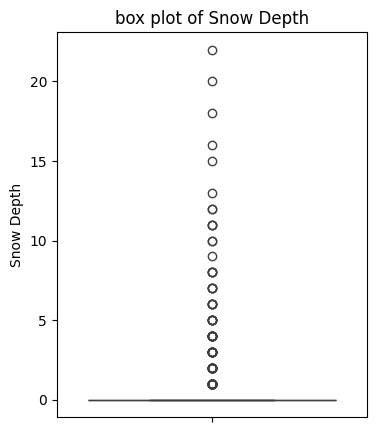

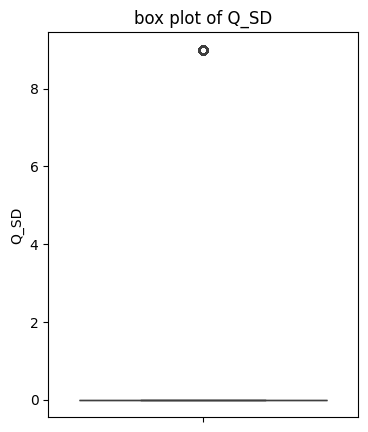

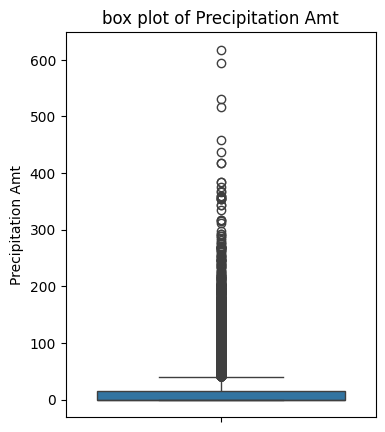

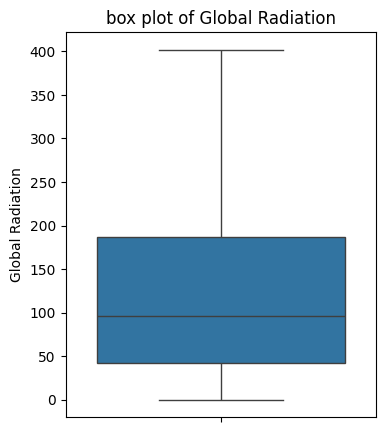

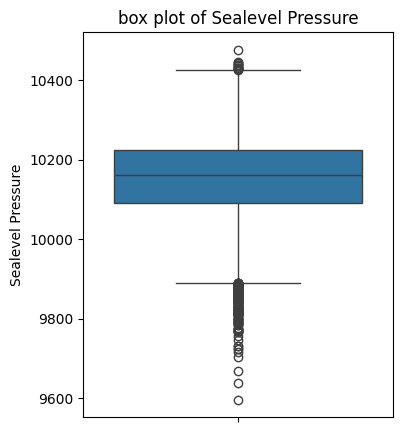

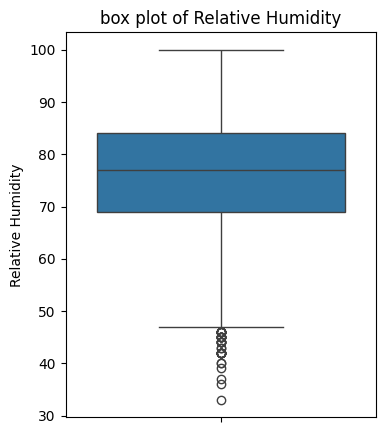

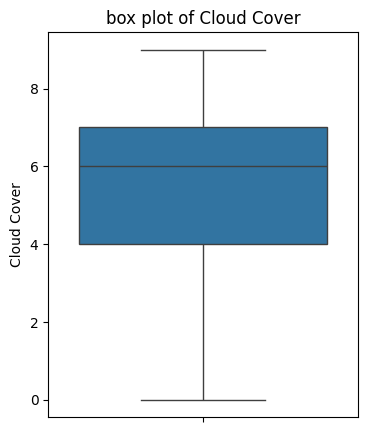

<Figure size 400x500 with 0 Axes>

In [266]:
#box plot for each column
for col in df.select_dtypes(include = 'number').columns: #slecting the numerical columns to remove ouliers 
    sns.boxplot(y=df[col])
    plt.title(f'box plot of {col}')
    plt.figure(figsize=(4,5))

In [267]:
#calculate IQR
for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    #define bounce
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    #removing outliers
    clean_data=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)][col]

<Axes: ylabel='Cloud Cover'>

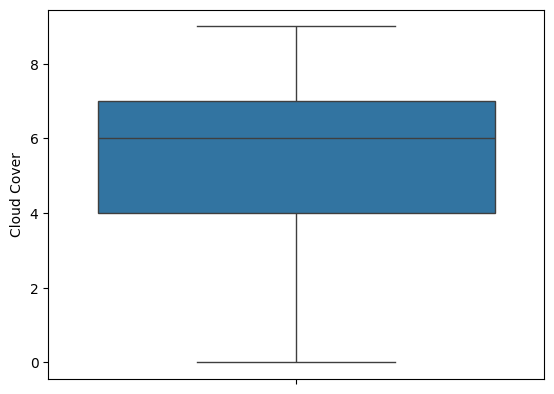

In [268]:
sns.boxplot(y=clean_data)

In [269]:
# Function to apply IQR method to fix outliers
def fix_outliers_iqr(df):
    num=df.select_dtypes(include='number').columns
    for col in num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
# Replace outliers with the respective bounds
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

In [270]:
df1=fix_outliers_iqr(df)
df1

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
0,19790101,23.0,Valid,-75.0,Valid,-41.0,0.0,70.0,Valid,0.0,...,4.0,Valid,52.0,Valid,10190.0,Valid,83.0,Valid,2.0,Valid
1,19790102,16.0,Valid,-75.0,Valid,-26.0,0.0,17.0,Valid,0.0,...,0.0,Valid,27.0,Valid,10253.0,Valid,76.0,Valid,6.0,Valid
2,19790103,13.0,Valid,-72.0,Valid,-28.0,0.0,0.0,Valid,0.0,...,0.0,Valid,13.0,Valid,10205.0,Valid,86.0,Valid,5.0,Valid
3,19790104,-3.0,Valid,-65.0,Valid,-26.0,0.0,0.0,Valid,0.0,...,0.0,Valid,13.0,Valid,10084.0,Valid,68.0,Valid,8.0,Valid
4,19790105,56.0,Valid,-14.0,Valid,-8.0,0.0,20.0,Valid,0.0,...,0.0,Valid,29.0,Valid,10225.0,Valid,73.0,Valid,6.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,Valid,55.0,Valid,89.0,0.0,0.0,Valid,0.0,...,40.0,Valid,12.0,Valid,10067.0,Valid,89.0,Valid,8.0,Valid
16432,20231228,119.0,Valid,97.0,Valid,112.0,0.0,2.0,Valid,0.0,...,40.0,Valid,15.0,Valid,10051.0,Valid,81.0,Valid,7.0,Valid
16433,20231229,122.0,Valid,92.0,Valid,106.0,0.0,7.0,Valid,0.0,...,0.0,Valid,20.0,Valid,10071.0,Valid,78.0,Valid,6.0,Valid
16434,20231230,107.0,Valid,56.0,Valid,89.0,0.0,0.0,Valid,0.0,...,40.0,Valid,12.0,Valid,10046.0,Valid,87.0,Valid,7.0,Valid


<Axes: >

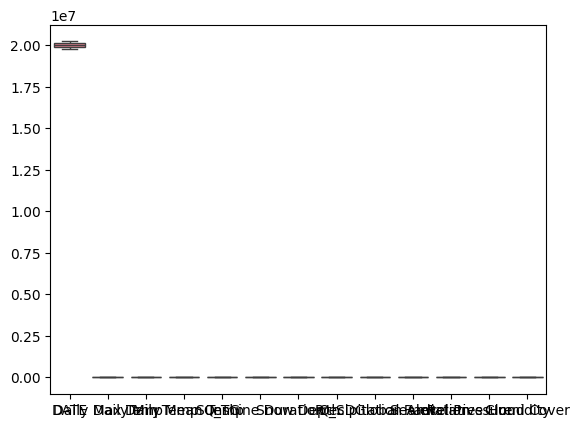

In [271]:
#outiers removed
sns.boxplot(data=df1)

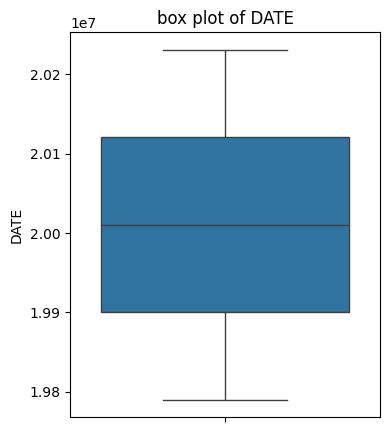

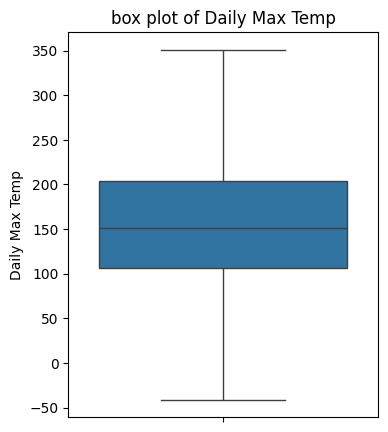

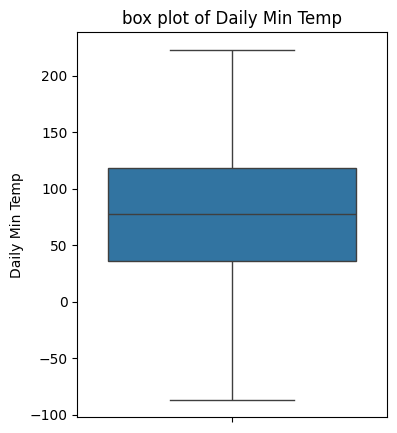

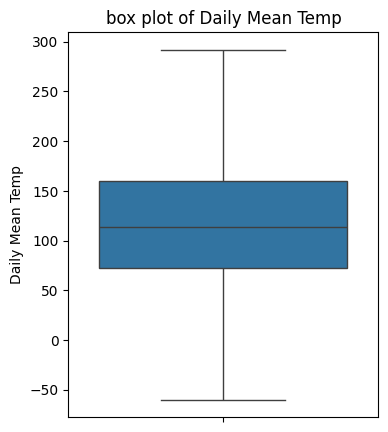

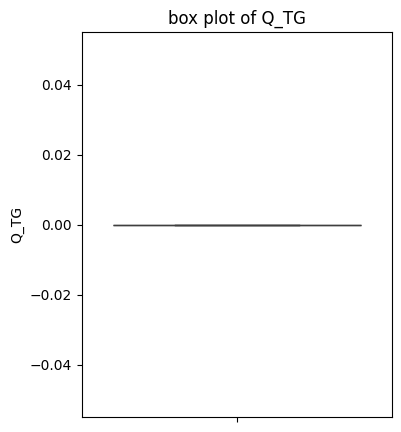

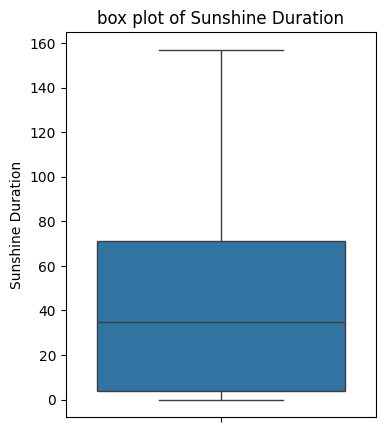

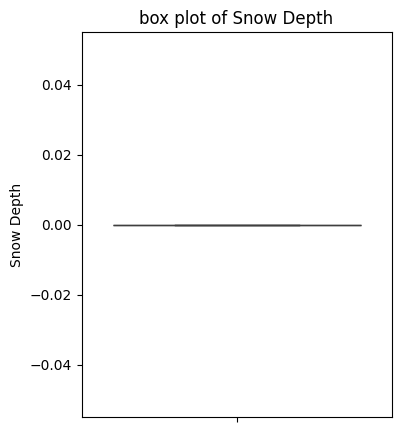

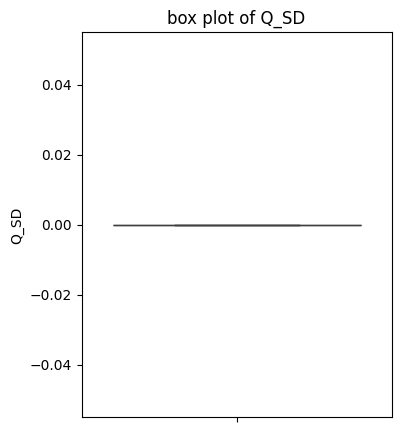

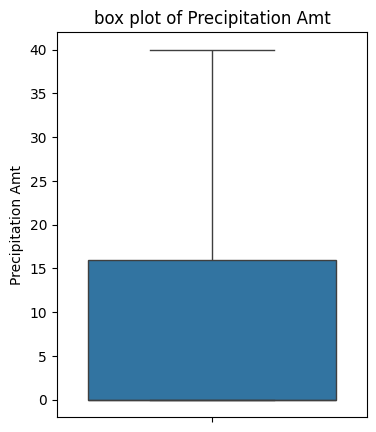

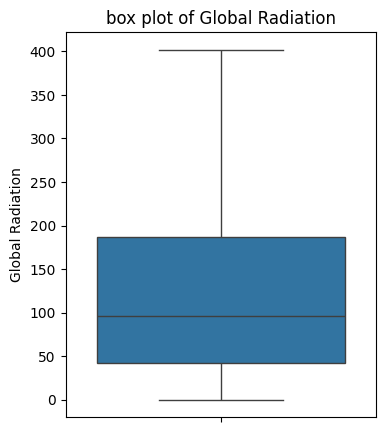

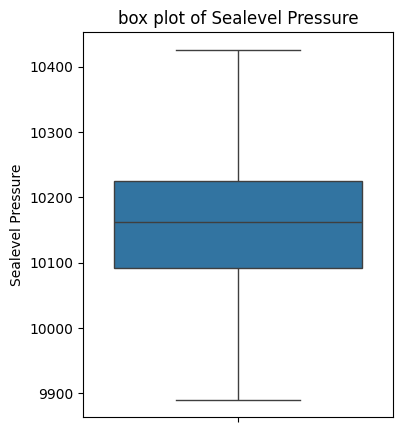

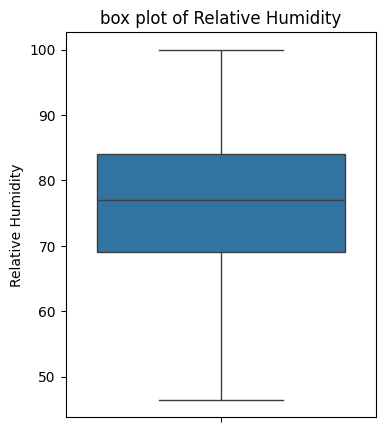

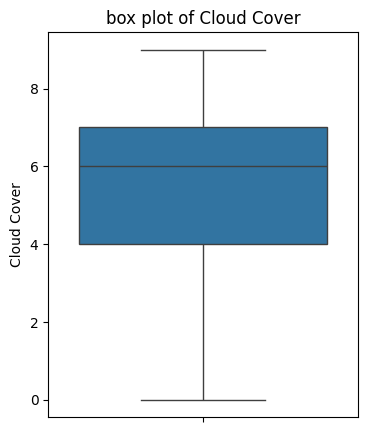

In [272]:
for col in df.select_dtypes(include = 'number').columns:
    plt.figure(figsize=(4,5))
    sns.boxplot(y=df[col])
    plt.title(f'box plot of {col}')

In [273]:
#selecting the numerical columns
numeric_columns = df.select_dtypes(include='number')

In [274]:
numeric_columns

,DATE,Daily Max Temp,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Snow Depth,Q_SD,Precipitation Amt,Global Radiation,Sealevel Pressure,Relative Humidity,Cloud Cover
0,19790101,23.0,-75.0,-41.0,0.0,70.0,0.0,0.0,4.0,52.0,10190.0,83.0,2.0
1,19790102,16.0,-75.0,-26.0,0.0,17.0,0.0,0.0,0.0,27.0,10253.0,76.0,6.0
2,19790103,13.0,-72.0,-28.0,0.0,0.0,0.0,0.0,0.0,13.0,10205.0,86.0,5.0
3,19790104,-3.0,-65.0,-26.0,0.0,0.0,0.0,0.0,0.0,13.0,10084.0,68.0,8.0
4,19790105,56.0,-14.0,-8.0,0.0,20.0,0.0,0.0,0.0,29.0,10225.0,73.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,55.0,89.0,0.0,0.0,0.0,0.0,40.0,12.0,10067.0,89.0,8.0
16432,20231228,119.0,97.0,112.0,0.0,2.0,0.0,0.0,40.0,15.0,10051.0,81.0,7.0
16433,20231229,122.0,92.0,106.0,0.0,7.0,0.0,0.0,0.0,20.0,10071.0,78.0,6.0
16434,20231230,107.0,56.0,89.0,0.0,0.0,0.0,0.0,40.0,12.0,10046.0,87.0,7.0


In [275]:
df1=df[['DATE' , 'Daily Max Temp', 'Daily Min Temp','Daily Mean Temp','Sunshine Duration','Precipitation Amt','Global Radiation','Sealevel Pressure','Relative Humidity','Cloud Cover']]
		

In [276]:
#correlation
cor = df1.corr()

In [277]:
cor

,DATE,Daily Max Temp,Daily Min Temp,Daily Mean Temp,Sunshine Duration,Precipitation Amt,Global Radiation,Sealevel Pressure,Relative Humidity,Cloud Cover
DATE,1.000000,0.095136,0.096000,0.099549,-0.005317,0.013815,0.019924,-0.008602,-0.087286,-0.102117
Daily Max Temp,0.095136,1.000000,0.809278,0.909609,0.469831,-0.121774,0.686392,0.097145,-0.498927,-0.220141
Daily Min Temp,0.096000,0.809278,1.000000,0.954929,0.215560,0.009597,0.475072,-0.080592,-0.314430,0.047431
Daily Mean Temp,0.099549,0.909609,0.954929,1.000000,0.393595,-0.050446,0.630591,-0.001178,-0.446077,-0.115703
Sunshine Duration,-0.005317,0.469831,0.215560,0.393595,1.000000,-0.315881,0.830282,0.229886,-0.730759,-0.756159
Precipitation Amt,0.013815,-0.121774,0.009597,-0.050446,-0.315881,1.000000,-0.227385,-0.455621,0.366948,0.311011
Global Radiation,0.019924,0.686392,0.475072,0.630591,0.830282,-0.227385,1.000000,0.151276,-0.757526,-0.487562
Sealevel Pressure,-0.008602,0.097145,-0.080592,-0.001178,0.229886,-0.455621,0.151276,1.000000,-0.235316,-0.249824
Relative Humidity,-0.087286,-0.498927,-0.314430,-0.446077,-0.730759,0.366948,-0.757526,-0.235316,1.000000,0.509800
Cloud Cover,-0.102117,-0.220141,0.047431,-0.115703,-0.756159,0.311011,-0.487562,-0.249824,0.509800,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

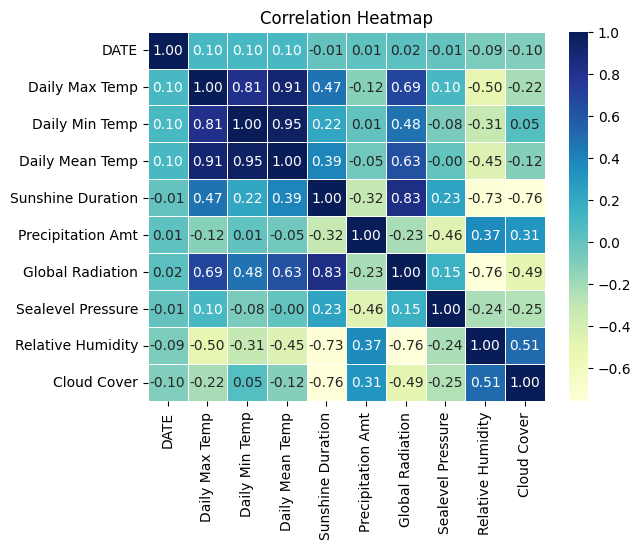

In [278]:
# Plot the heatmap
sns.heatmap(cor,annot=True,cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

In [279]:
#0%
#Sealevel Pressure -Daily Mean Temp

In [280]:
#80 % and above 
#Sunshine Duration - Global Radiation


In [281]:
#50 % and above 
#Global Radiation - Daily Max Temp 
#Daily Mean Temp - Global Radiation
#Cloud Cover - Relative Humidity


In [282]:
#50 % and Below 
#Cloud Cover - Precipitation Amt
#Relative Humidity -  Precipitation Amt
#Sunshine Duration - Daily Max Temp
#Daily Mean Temp - Sunshine Duration

In [283]:
#skewness
cor.skew()

DATE                 2.871603
Daily Max Temp      -0.141561
Daily Min Temp       0.423991
Daily Mean Temp      0.055184
Sunshine Duration   -0.258575
Precipitation Amt    1.296950
Global Radiation    -0.413332
Sealevel Pressure    1.599736
Relative Humidity    0.864362
Cloud Cover          0.675334
dtype: float64

In [284]:
#power transformer method
pt= PowerTransformer(method= 'yeo-johnson')

In [285]:
numeric_cols = cor.select_dtypes(include=['float64', 'int64']).columns

In [286]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

In [287]:
df_transformed.skew()

DATE                -0.001946
Daily Max Temp      -0.029291
Daily Min Temp      -0.217980
Daily Mean Temp     -0.100502
Sunshine Duration   -0.262462
Precipitation Amt    0.375000
Global Radiation    -0.097804
Sealevel Pressure   -0.005065
Relative Humidity   -0.065884
Cloud Cover         -0.288107
dtype: float64

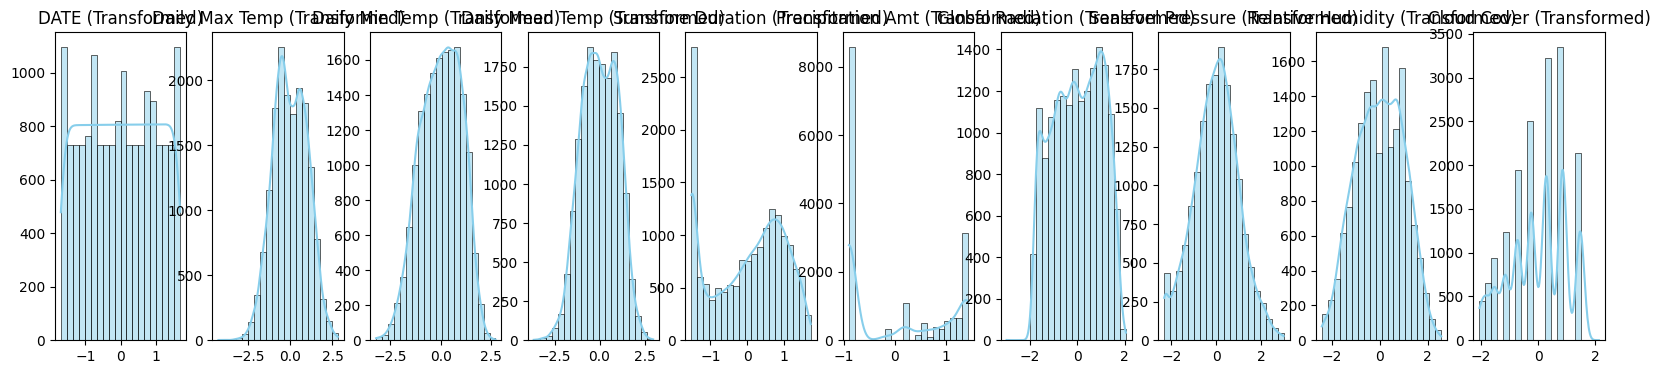

In [288]:
plt.figure(figsize=(20, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(df_transformed[col], kde=True, bins=20, color='skyblue')
    plt.title(f"{col} (Transformed)")
    plt.xlabel('')
    plt.ylabel('')

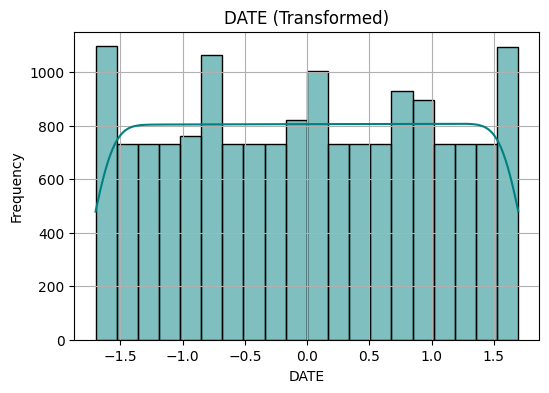

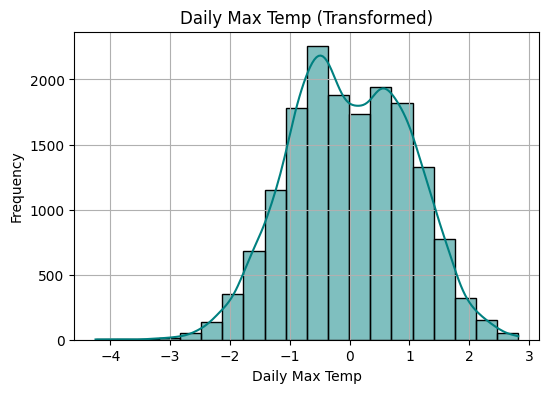

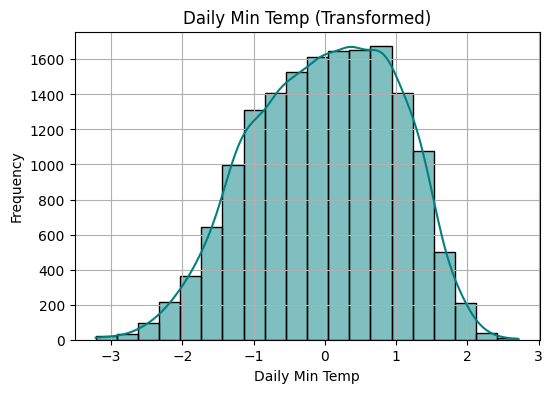

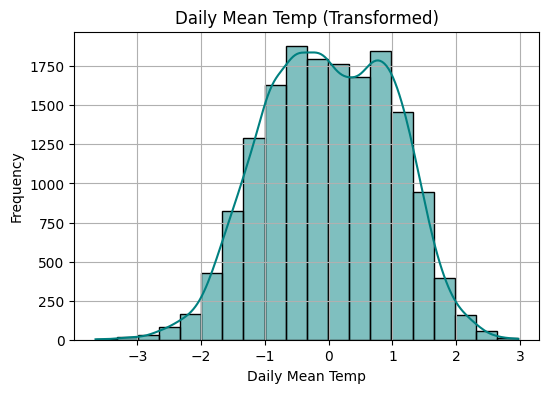

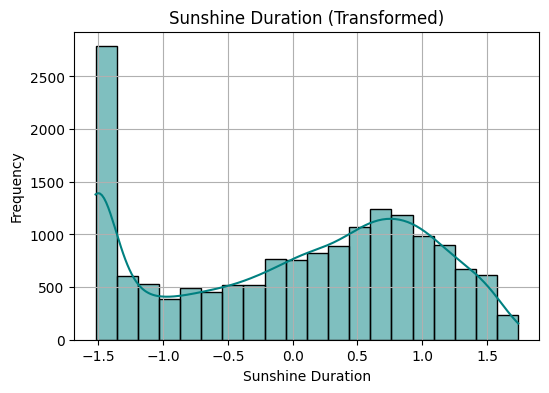

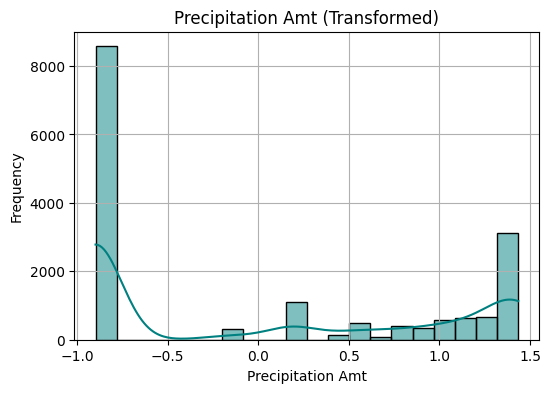

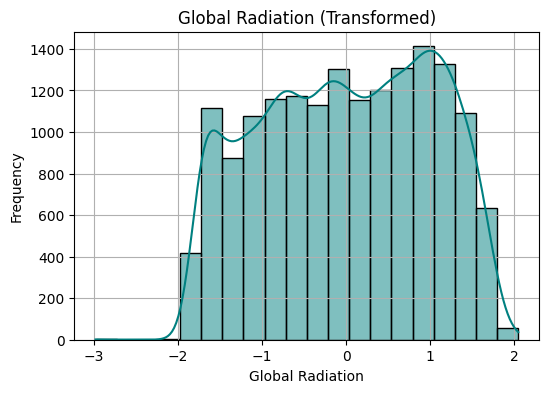

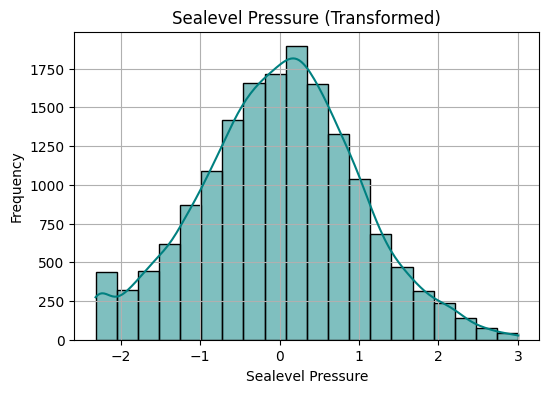

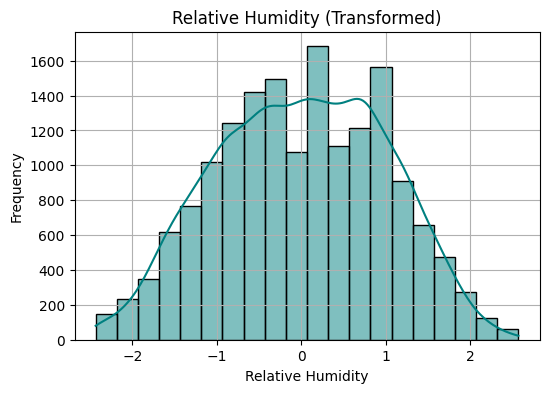

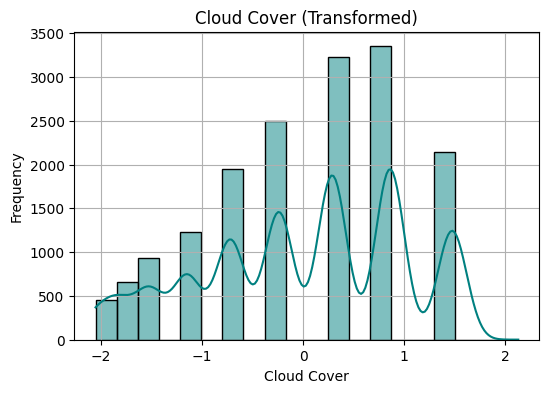

In [289]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='teal')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)

In [290]:
df

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
0,19790101,23.0,Valid,-75.0,Valid,-41.0,0.0,70.0,Valid,0.0,...,4.0,Valid,52.0,Valid,10190.0,Valid,83.0,Valid,2.0,Valid
1,19790102,16.0,Valid,-75.0,Valid,-26.0,0.0,17.0,Valid,0.0,...,0.0,Valid,27.0,Valid,10253.0,Valid,76.0,Valid,6.0,Valid
2,19790103,13.0,Valid,-72.0,Valid,-28.0,0.0,0.0,Valid,0.0,...,0.0,Valid,13.0,Valid,10205.0,Valid,86.0,Valid,5.0,Valid
3,19790104,-3.0,Valid,-65.0,Valid,-26.0,0.0,0.0,Valid,0.0,...,0.0,Valid,13.0,Valid,10084.0,Valid,68.0,Valid,8.0,Valid
4,19790105,56.0,Valid,-14.0,Valid,-8.0,0.0,20.0,Valid,0.0,...,0.0,Valid,29.0,Valid,10225.0,Valid,73.0,Valid,6.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,Valid,55.0,Valid,89.0,0.0,0.0,Valid,0.0,...,40.0,Valid,12.0,Valid,10067.0,Valid,89.0,Valid,8.0,Valid
16432,20231228,119.0,Valid,97.0,Valid,112.0,0.0,2.0,Valid,0.0,...,40.0,Valid,15.0,Valid,10051.0,Valid,81.0,Valid,7.0,Valid
16433,20231229,122.0,Valid,92.0,Valid,106.0,0.0,7.0,Valid,0.0,...,0.0,Valid,20.0,Valid,10071.0,Valid,78.0,Valid,6.0,Valid
16434,20231230,107.0,Valid,56.0,Valid,89.0,0.0,0.0,Valid,0.0,...,40.0,Valid,12.0,Valid,10046.0,Valid,87.0,Valid,7.0,Valid


In [291]:
#Label encoding
le= LabelEncoder()

In [292]:
df['Q_TX']=le.fit_transform(df['Q_TX'])

In [293]:
df['Q_TN']=le.fit_transform(df['Q_TN'])

In [294]:
df['Q_SS']=le.fit_transform(df['Q_SS'])

In [295]:
df['Q_RR']=le.fit_transform(df['Q_RR'])

In [296]:
df['Q_QQ']=le.fit_transform(df['Q_QQ'])

In [297]:
df['Q_PP']=le.fit_transform(df['Q_PP'])

In [298]:
df['Q_HU']=le.fit_transform(df['Q_HU'])

In [299]:
df['Q_CC']=le.fit_transform(df['Q_CC'])

In [300]:
df

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
0,19790101,23.0,1,-75.0,1,-41.0,0.0,70.0,0,0.0,...,4.0,0,52.0,2,10190.0,1,83.0,1,2.0,2
1,19790102,16.0,1,-75.0,1,-26.0,0.0,17.0,0,0.0,...,0.0,0,27.0,2,10253.0,1,76.0,1,6.0,2
2,19790103,13.0,1,-72.0,1,-28.0,0.0,0.0,0,0.0,...,0.0,0,13.0,2,10205.0,1,86.0,1,5.0,2
3,19790104,-3.0,1,-65.0,1,-26.0,0.0,0.0,0,0.0,...,0.0,0,13.0,2,10084.0,1,68.0,1,8.0,2
4,19790105,56.0,1,-14.0,1,-8.0,0.0,20.0,0,0.0,...,0.0,0,29.0,2,10225.0,1,73.0,1,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,1,55.0,1,89.0,0.0,0.0,0,0.0,...,40.0,0,12.0,2,10067.0,1,89.0,1,8.0,2
16432,20231228,119.0,1,97.0,1,112.0,0.0,2.0,0,0.0,...,40.0,0,15.0,2,10051.0,1,81.0,1,7.0,2
16433,20231229,122.0,1,92.0,1,106.0,0.0,7.0,0,0.0,...,0.0,0,20.0,2,10071.0,1,78.0,1,6.0,2
16434,20231230,107.0,1,56.0,1,89.0,0.0,0.0,0,0.0,...,40.0,0,12.0,2,10046.0,1,87.0,1,7.0,2


In [301]:
df['Q_TN'].value_counts()

Q_TN
1    16182
0      254
Name: count, dtype: int64

In [302]:
#one hot encoding
ohe=OneHotEncoder(sparse_output=False)

In [303]:
qnt=ohe.fit_transform(df[['Q_TN']])

In [304]:
cols=ohe.get_feature_names_out(['Q_TN'])

In [305]:
df_encoded=pd.DataFrame(qnt,columns=cols)

In [306]:
merge=pd.concat([df.drop('Q_TN',axis=1),df_encoded],axis=1)

In [307]:
merge

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,Q_SD,...,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC,Q_TN_0,Q_TN_1
0,19790101,23.0,1,-75.0,-41.0,0.0,70.0,0,0.0,0.0,...,52.0,2,10190.0,1,83.0,1,2.0,2,0.0,1.0
1,19790102,16.0,1,-75.0,-26.0,0.0,17.0,0,0.0,0.0,...,27.0,2,10253.0,1,76.0,1,6.0,2,0.0,1.0
2,19790103,13.0,1,-72.0,-28.0,0.0,0.0,0,0.0,0.0,...,13.0,2,10205.0,1,86.0,1,5.0,2,0.0,1.0
3,19790104,-3.0,1,-65.0,-26.0,0.0,0.0,0,0.0,0.0,...,13.0,2,10084.0,1,68.0,1,8.0,2,0.0,1.0
4,19790105,56.0,1,-14.0,-8.0,0.0,20.0,0,0.0,0.0,...,29.0,2,10225.0,1,73.0,1,6.0,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,1,55.0,89.0,0.0,0.0,0,0.0,0.0,...,12.0,2,10067.0,1,89.0,1,8.0,2,0.0,1.0
16432,20231228,119.0,1,97.0,112.0,0.0,2.0,0,0.0,0.0,...,15.0,2,10051.0,1,81.0,1,7.0,2,0.0,1.0
16433,20231229,122.0,1,92.0,106.0,0.0,7.0,0,0.0,0.0,...,20.0,2,10071.0,1,78.0,1,6.0,2,0.0,1.0
16434,20231230,107.0,1,56.0,89.0,0.0,0.0,0,0.0,0.0,...,12.0,2,10046.0,1,87.0,1,7.0,2,0.0,1.0


In [308]:
df['Q_QQ'].value_counts()

Q_QQ
2    16356
1       55
0       25
Name: count, dtype: int64

In [309]:
ohe=OneHotEncoder(sparse_output=False)

In [310]:
qqq=ohe.fit_transform(df[['Q_QQ']])

In [311]:
cols=ohe.get_feature_names_out(['Q_QQ'])

In [312]:
df_encoded=pd.DataFrame(qqq,columns=cols)

In [313]:
df_encoded

,Q_QQ_0,Q_QQ_1,Q_QQ_2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
16431,0.0,0.0,1.0
16432,0.0,0.0,1.0
16433,0.0,0.0,1.0
16434,0.0,0.0,1.0


In [314]:
df2=pd.concat([merge.drop('Q_QQ',axis=1),df_encoded],axis=1)

In [315]:
df2

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,Q_SD,...,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC,Q_TN_0,Q_TN_1,Q_QQ_0,Q_QQ_1,Q_QQ_2
0,19790101,23.0,1,-75.0,-41.0,0.0,70.0,0,0.0,0.0,...,1,83.0,1,2.0,2,0.0,1.0,0.0,0.0,1.0
1,19790102,16.0,1,-75.0,-26.0,0.0,17.0,0,0.0,0.0,...,1,76.0,1,6.0,2,0.0,1.0,0.0,0.0,1.0
2,19790103,13.0,1,-72.0,-28.0,0.0,0.0,0,0.0,0.0,...,1,86.0,1,5.0,2,0.0,1.0,0.0,0.0,1.0
3,19790104,-3.0,1,-65.0,-26.0,0.0,0.0,0,0.0,0.0,...,1,68.0,1,8.0,2,0.0,1.0,0.0,0.0,1.0
4,19790105,56.0,1,-14.0,-8.0,0.0,20.0,0,0.0,0.0,...,1,73.0,1,6.0,2,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,1,55.0,89.0,0.0,0.0,0,0.0,0.0,...,1,89.0,1,8.0,2,0.0,1.0,0.0,0.0,1.0
16432,20231228,119.0,1,97.0,112.0,0.0,2.0,0,0.0,0.0,...,1,81.0,1,7.0,2,0.0,1.0,0.0,0.0,1.0
16433,20231229,122.0,1,92.0,106.0,0.0,7.0,0,0.0,0.0,...,1,78.0,1,6.0,2,0.0,1.0,0.0,0.0,1.0
16434,20231230,107.0,1,56.0,89.0,0.0,0.0,0,0.0,0.0,...,1,87.0,1,7.0,2,0.0,1.0,0.0,0.0,1.0


In [316]:
df['Q_PP'].value_counts()

Q_PP
1    16432
0        4
Name: count, dtype: int64

In [317]:
ohe=OneHotEncoder(sparse_output=False)

In [318]:
qpp=ohe.fit_transform(df[['Q_PP']])

In [319]:
cols=ohe.get_feature_names_out(['Q_PP'])

In [320]:
df_encoded=pd.DataFrame(qpp,columns=cols)

In [321]:
df_encoded

,Q_PP_0,Q_PP_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
16431,0.0,1.0
16432,0.0,1.0
16433,0.0,1.0
16434,0.0,1.0


In [322]:
df3=pd.concat([df2.drop('Q_PP',axis=1),df_encoded],axis=1)

In [323]:
df3

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,Q_SD,...,Q_HU,Cloud Cover,Q_CC,Q_TN_0,Q_TN_1,Q_QQ_0,Q_QQ_1,Q_QQ_2,Q_PP_0,Q_PP_1
0,19790101,23.0,1,-75.0,-41.0,0.0,70.0,0,0.0,0.0,...,1,2.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,19790102,16.0,1,-75.0,-26.0,0.0,17.0,0,0.0,0.0,...,1,6.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,19790103,13.0,1,-72.0,-28.0,0.0,0.0,0,0.0,0.0,...,1,5.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,19790104,-3.0,1,-65.0,-26.0,0.0,0.0,0,0.0,0.0,...,1,8.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,19790105,56.0,1,-14.0,-8.0,0.0,20.0,0,0.0,0.0,...,1,6.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,1,55.0,89.0,0.0,0.0,0,0.0,0.0,...,1,8.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
16432,20231228,119.0,1,97.0,112.0,0.0,2.0,0,0.0,0.0,...,1,7.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
16433,20231229,122.0,1,92.0,106.0,0.0,7.0,0,0.0,0.0,...,1,6.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
16434,20231230,107.0,1,56.0,89.0,0.0,0.0,0,0.0,0.0,...,1,7.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [324]:
df['Q_HU'].value_counts()

Q_HU
1    16379
0       57
Name: count, dtype: int64

In [325]:
ohe=OneHotEncoder(sparse_output=False)

In [326]:
qhu=ohe.fit_transform(df[['Q_HU']])

In [327]:
cols=ohe.get_feature_names_out(['Q_HU'])

In [328]:
df_encoded=pd.DataFrame(qhu,columns=cols)

In [329]:
df_encoded

,Q_HU_0,Q_HU_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
16431,0.0,1.0
16432,0.0,1.0
16433,0.0,1.0
16434,0.0,1.0


In [330]:
df4=pd.concat([df3.drop('Q_HU',axis=1),df_encoded],axis=1)

In [331]:
df4

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,Q_SD,...,Q_CC,Q_TN_0,Q_TN_1,Q_QQ_0,Q_QQ_1,Q_QQ_2,Q_PP_0,Q_PP_1,Q_HU_0,Q_HU_1
0,19790101,23.0,1,-75.0,-41.0,0.0,70.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,19790102,16.0,1,-75.0,-26.0,0.0,17.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,19790103,13.0,1,-72.0,-28.0,0.0,0.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,19790104,-3.0,1,-65.0,-26.0,0.0,0.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,19790105,56.0,1,-14.0,-8.0,0.0,20.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,1,55.0,89.0,0.0,0.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
16432,20231228,119.0,1,97.0,112.0,0.0,2.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
16433,20231229,122.0,1,92.0,106.0,0.0,7.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
16434,20231230,107.0,1,56.0,89.0,0.0,0.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [332]:
df['Q_CC'].value_counts()

Q_CC
2    16416
0       18
1        2
Name: count, dtype: int64

In [333]:
ohe=OneHotEncoder(sparse_output=False)

In [334]:
qcc=ohe.fit_transform(df[['Q_CC']])

In [335]:
cols=ohe.get_feature_names_out(['Q_CC'])

In [336]:
df_encoded=pd.DataFrame(qcc,columns=cols)

In [337]:
df_encoded

,Q_CC_0,Q_CC_1,Q_CC_2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
16431,0.0,0.0,1.0
16432,0.0,0.0,1.0
16433,0.0,0.0,1.0
16434,0.0,0.0,1.0


In [338]:
df5=pd.concat([df4.drop('Q_CC',axis=1),df_encoded],axis=1)

In [339]:
df5

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,Q_SD,...,Q_QQ_0,Q_QQ_1,Q_QQ_2,Q_PP_0,Q_PP_1,Q_HU_0,Q_HU_1,Q_CC_0,Q_CC_1,Q_CC_2
0,19790101,23.0,1,-75.0,-41.0,0.0,70.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,19790102,16.0,1,-75.0,-26.0,0.0,17.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,19790103,13.0,1,-72.0,-28.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,19790104,-3.0,1,-65.0,-26.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,19790105,56.0,1,-14.0,-8.0,0.0,20.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,1,55.0,89.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
16432,20231228,119.0,1,97.0,112.0,0.0,2.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
16433,20231229,122.0,1,92.0,106.0,0.0,7.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
16434,20231230,107.0,1,56.0,89.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [340]:
print('length of original data frame ',len(df5))

length of original data frame  16436


In [341]:
df['Q_TX'].value_counts()

Q_TX
1    15317
0     1119
Name: count, dtype: int64

In [342]:
#smoting technique to balance x and y value counts
smote=SMOTE()

In [343]:
x_smote, y_smote =smote.fit_resample(df5[(i for i in list (df5.describe(include='all').columns)if i !='Q_TX')],df5['Q_TX'])

In [344]:
print('length of y smote', len(y_smote))

length of y smote 30634


In [345]:
balanced_df=pd.DataFrame(x_smote, columns=list(i for i in list(df5.describe(include='all').columns)if i!='Q_TX'))

In [346]:
balanced_df

,DATE,Daily Max Temp,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,Q_SD,Precipitation Amt,...,Q_QQ_0,Q_QQ_1,Q_QQ_2,Q_PP_0,Q_PP_1,Q_HU_0,Q_HU_1,Q_CC_0,Q_CC_1,Q_CC_2
0,19790101,23.000000,-75.000000,-41.000000,0.0,70.000000,0,0.0,0.0,4.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,19790102,16.000000,-75.000000,-26.000000,0.0,17.000000,0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,19790103,13.000000,-72.000000,-28.000000,0.0,0.000000,0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,19790104,-3.000000,-65.000000,-26.000000,0.0,0.000000,0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,19790105,56.000000,-14.000000,-8.000000,0.0,20.000000,0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30629,19931037,105.342655,106.333429,124.138965,0.0,2.564798,0,0.0,0.0,4.638893,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
30630,20001213,91.680495,91.049329,103.942828,0.0,29.957121,0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
30631,19851154,58.154672,69.856059,92.010731,0.0,11.773358,0,0.0,0.0,6.464015,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
30632,20000951,153.049684,125.370124,170.894967,0.0,90.709904,0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [347]:
print('length of y smote', len(y_smote))

length of y smote 30634


In [348]:
balanced_df['Q_TX'] = y_smote

In [349]:
balanced_df.shape

(30634, 28)

In [350]:
balanced_df['Q_TX'].value_counts()

Q_TX
1    15317
0    15317
Name: count, dtype: int64

In [351]:
#K best feature selection
skb=SelectKBest(score_func=f_classif,k=20)

In [352]:
balanced_df.columns

Index(['DATE', 'Daily Max Temp', 'Daily Min Temp', 'Daily Mean Temp', 'Q_TG',
       'Sunshine Duration', 'Q_SS', 'Snow Depth', 'Q_SD', 'Precipitation Amt',
       'Q_RR', 'Global Radiation', 'Sealevel Pressure', 'Relative Humidity',
       'Cloud Cover', 'Q_TN_0', 'Q_TN_1', 'Q_QQ_0', 'Q_QQ_1', 'Q_QQ_2',
       'Q_PP_0', 'Q_PP_1', 'Q_HU_0', 'Q_HU_1', 'Q_CC_0', 'Q_CC_1', 'Q_CC_2',
       'Q_TX'],
      dtype='object')

In [353]:
Y=balanced_df['Q_TX']

In [354]:
X=balanced_df.drop('Q_TX',axis=1)

In [355]:
X.columns

Index(['DATE', 'Daily Max Temp', 'Daily Min Temp', 'Daily Mean Temp', 'Q_TG',
       'Sunshine Duration', 'Q_SS', 'Snow Depth', 'Q_SD', 'Precipitation Amt',
       'Q_RR', 'Global Radiation', 'Sealevel Pressure', 'Relative Humidity',
       'Cloud Cover', 'Q_TN_0', 'Q_TN_1', 'Q_QQ_0', 'Q_QQ_1', 'Q_QQ_2',
       'Q_PP_0', 'Q_PP_1', 'Q_HU_0', 'Q_HU_1', 'Q_CC_0', 'Q_CC_1', 'Q_CC_2'],
      dtype='object')

In [361]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
30629    0
30630    0
30631    0
30632    0
30633    0
Name: Q_TX, Length: 30634, dtype: int64

In [371]:
X_new=skb.fit_transform(X,Y)
X_new

C:\Users\netha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 4  6  7  8 10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\netha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array([[ 1.97901010e+07,  2.30000000e+01, -7.50000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.97901020e+07,  1.60000000e+01, -7.50000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.97901030e+07,  1.30000000e+01, -7.20000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.98511540e+07,  5.81546716e+01,  6.98560590e+01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 2.00009510e+07,  1.53049684e+02,  1.25370124e+02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 2.01809190e+07,  1.76220418e+02,  1.60148492e+02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],
      shape=(30634, 20))

In [365]:
selected_columns=X.columns[skb.get_support()]

In [366]:
selected_columns

Index(['DATE', 'Daily Max Temp', 'Daily Min Temp', 'Sunshine Duration',
       'Precipitation Amt', 'Global Radiation', 'Sealevel Pressure',
       'Relative Humidity', 'Cloud Cover', 'Q_TN_0', 'Q_TN_1', 'Q_QQ_1',
       'Q_QQ_2', 'Q_PP_0', 'Q_PP_1', 'Q_HU_0', 'Q_HU_1', 'Q_CC_0', 'Q_CC_1',
       'Q_CC_2'],
      dtype='object')

In [368]:
feature_scores =pd.DataFrame({'feature':X.columns,'score':skb.scores_}).sort_values(by='score',ascending=False)

In [369]:
feature_scores

,feature,score
1,Daily Max Temp,7474.498343
15,Q_TN_0,6094.581334
16,Q_TN_1,6094.581334
11,Global Radiation,1913.808797
5,Sunshine Duration,1394.846743
14,Cloud Cover,1363.199430
9,Precipitation Amt,1068.526289
12,Sealevel Pressure,885.597056
13,Relative Humidity,880.731197
2,Daily Min Temp,413.899004


In [ ]:
X_selected=X[selected_columns]

In [ ]:
X_selected

In [ ]:
#scaling
ss=StandardScaler()

In [ ]:
X_scaled=ss.fit_transform(X_selected)

In [ ]:
X_scaled

In [ ]:
#train ,test and split function
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=40)

In [ ]:
print("X_train shape" ,X_train.shape)

In [ ]:
print("Y_train shape",Y_train.shape)

In [ ]:
print("X_test shape",X_test.shape)

In [ ]:
print("Y_test shape",Y_test.shape)

In [ ]:
Y.value_counts()